In [12]:
import pandas as pd


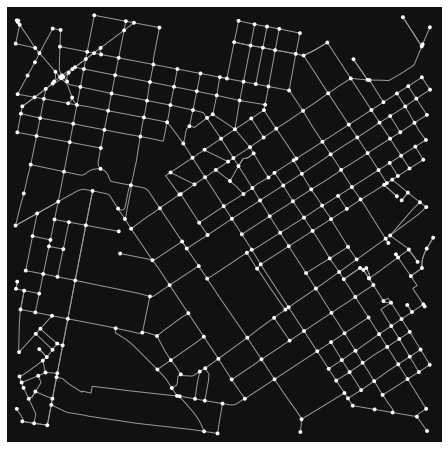

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [13]:
import osmnx as ox
import pandas as pd
df = pd.read_pickle("block4_1_4_concat.pkl")
lat = df.iloc[1,0]
lon = df.iloc[1,1]
graph = ox.graph_from_point((lat,lon), network_type='drive', dist=700)
ox.plot.plot_graph(graph)

In [14]:

df_nodes = df[['nearest_edge_start_node','nearest_edge_end_node','len']].reset_index()[['nearest_edge_start_node','nearest_edge_end_node','len']].drop_duplicates()
selected_edges = [(u,v) for u,v,e in graph.edges(data=True) if (u in df_nodes.nearest_edge_start_node.values and v in df_nodes.nearest_edge_end_node.values)
                  or (v in df_nodes.nearest_edge_start_node.values and u in df_nodes.nearest_edge_end_node.values)]
u,v  = zip(*selected_edges)
df_nodes["edge_id"] = df_nodes["nearest_edge_start_node"].astype(str)+"_"+df_nodes["nearest_edge_end_node"].astype(str)

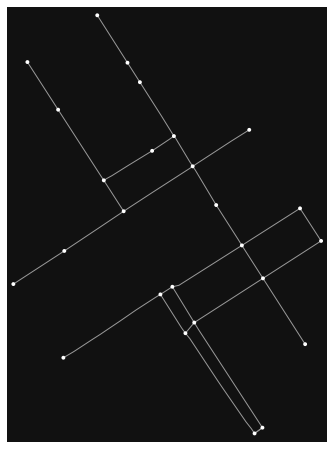

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [15]:
H = graph.subgraph(u + v)
ox.plot.plot_graph(H)

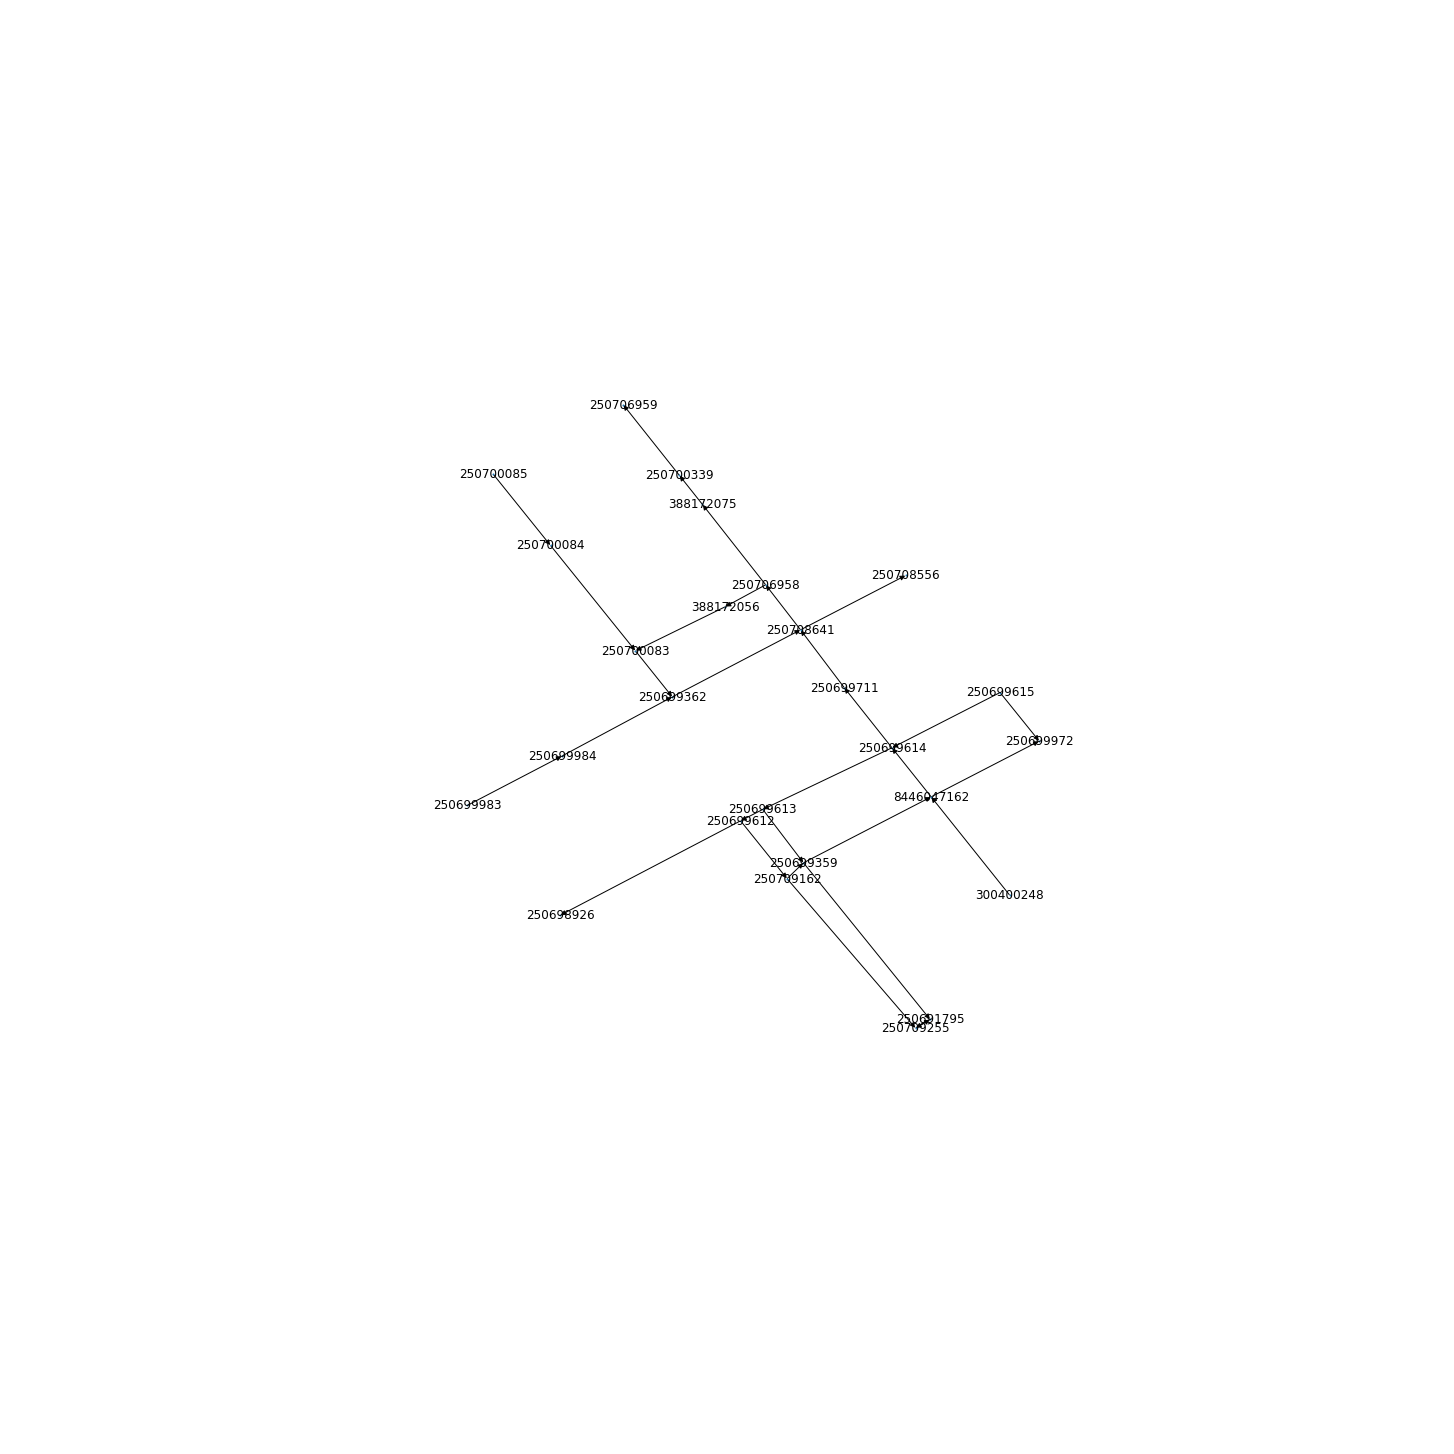

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
labels = {}
pos = {}
nodes = list(set(u+v))
plt.figure(figsize=(20,20)) 
for node in nodes:
    #if node in hubs:
        #set the node name as the key and the label as its value 
    pos[node] = (graph.nodes[node]['x'],graph.nodes[node]['y'] )  
    labels[node] = node
#set the argument 'with labels' to False so you have unlabeled graph
nx.draw(H,pos, with_labels=True,node_size=1)


In [7]:
edge_list = df[df.type.isin(["Car","Taxi"])][['edge_id']].reset_index()[['edge_id','id']].drop_duplicates().groupby(['edge_id']).count().reset_index()
edge_list

,edge_id,id
0,250691795_250699359,1300
1,250698926_250699612,784
2,250699359_8446047162,337
3,250699362_250699984,901
4,250699362_250708641,855
5,250699613_250699614,590
6,250699614_250699615,577
7,250699614_250699711,907
8,250699972_8446047162,390
9,250699983_250699984,326


In [8]:
import numpy as np
df = df[df.edge_id.isin(edge_list[edge_list.id >= 200]['edge_id'])]

In [18]:
def length(start_node,end_node,graph):
    
    try:
        val = graph[start_node][end_node][0]["length"]
    except KeyError:
        
        try:
            val = graph[end_node][start_node][0]["length"]
        except KeyError:
            val = np.nan
 
    return val

df_nodes = df.reset_index()[['nearest_edge_start_node','nearest_edge_end_node','edge_id']].drop_duplicates()
df_nodes['len'] = df_nodes.apply(lambda x: length(x[0],x[1],graph),axis = 1)
df['len'] = df['edge_id'].map(df_nodes.set_index('edge_id')['len'])
df['node_veh_dist'] = df['edge_progress'] * df['len']


In [11]:
edges_to_select = df_nodes[df_nodes.len >=65].edge_id.unique()
df = df[df.edge_id.isin(edges_to_select)]
df.head()

lat        lon    speed  lon_acc  lat_acc  type  \
id time  file_name                                                          
1  42.00 4_1        37.982746  23.732961  11.9046  -0.1145   0.0138  Taxi   
   42.04 4_1        37.982746  23.732963  11.8975  -0.1007   0.0147  Taxi   
   42.08 4_1        37.982747  23.732964  11.8919  -0.0918   0.0157  Taxi   
   42.12 4_1        37.982748  23.732965  11.8871  -0.0869   0.0167  Taxi   
   42.16 4_1        37.982748  23.732966  11.8831  -0.0784   0.0176  Taxi   

                    traveled_d  avg_speed   bearing  nearest_edge_start_node  \
id time  file_name                                                             
1  42.00 4_1            182.37   9.740748  1.570795                250699362   
   42.04 4_1            182.37   9.740748  0.168572                250699362   
   42.08 4_1            182.37   9.740748  0.168573                250699362   
   42.12 4_1            182.37   9.740748  1.570796                250699362   
   42.16 4_1            182.37   9.740748  0.328080                250699362   

                    ...  dir  xtrack_dist  edge_progress_intervals  \
id time  file_name  ...                                              
1  42.00 4_1        ...    0    -1.883401                      0.3   
   42.04 4_1        ...    0    -1.980795                      0.3   
   42.08 4_1        ...    0    -1.937041                      0.3   
   42.12 4_1        ...    0    -1.893287                      0.3   
   42.16 4_1        ...    0    -1.941984                      0.3   

                                edge_id     len lanes  node_veh_dist  \
id time  file_name                                                     
1  42.00 4_1        250699362_250699984  97.581     1      29.814330   
   42.04 4_1        250699362_250699984  97.581     1      29.674830   
   42.08 4_1        250699362_250699984  97.581     1      29.537753   
   42.12 4_1        250699362_250699984  97.581     1      29.400718   
   42.16 4_1        250699362_250699984  97.581     1      29.330986   

                    edge_seg  vehicle_density  avg_surr_speed  
id time  file_name                                             
1  42.00 4_1             1.0                7       10.464171  
   42.04 4_1             1.0                7       10.457843  
   42.08 4_1             1.0                7       10.452857  
   42.12 4_1             1.0                7       10.448586  
   42.16 4_1             1.0                7       10.444986  

[5 rows x 22 columns]

In [12]:
edge_list = df.reset_index()[['edge_id','nearest_edge_start_node','nearest_edge_end_node','id']].drop_duplicates().groupby(['edge_id','nearest_edge_start_node','nearest_edge_end_node']).count().reset_index()
edge_list

,edge_id,nearest_edge_start_node,nearest_edge_end_node,id
0,250691795_250699359,250691795,250699359,1300
1,250698926_250699612,250698926,250699612,784
2,250699359_8446047162,250699359,8446047162,337
3,250699362_250699984,250699362,250699984,901
4,250699362_250708641,250699362,250708641,855
5,250699613_250699614,250699613,250699614,590
6,250699614_250699615,250699614,250699615,577
7,250699614_250699711,250699614,250699711,907
8,250699972_8446047162,250699972,8446047162,390
9,250699983_250699984,250699983,250699984,326


In [13]:
def oneway(start_node,end_node):
    
    try:
        print(graph[start_node][end_node][0]["oneway"])
    except KeyError:
        print(graph[end_node][start_node][0]["oneway"])
        
edge_list.apply(lambda x: oneway(x[1],x[2]),axis = 1)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
dtype: object

In [ ]:

def how_many_lanes(start_node,end_node):
    try:
        highway = graph[start_node][end_node][0]['highway'] 
    except KeyError:
        highway = graph[end_node][start_node][0]['highway']
        
    if highway in ['secondary','tertiary','primary','residential','unclassified','service','track','path']:
        val = 1
    elif highway in ['motorway','trunk']:
        val = 2
    else:
        val = 0
    return val

for u,v,_ in list(H2.edges):
    oneway(u,v)
